In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Adding treatment feature according to the medication prescribed

In [34]:
#importing diabetes data
data = pd.read_csv('C:/Users/makam/Desktop/Capstone Project/diabetic_data.csv')
data1 = pd.read_csv('C:/Users/makam/Desktop/Capstone Project/diabetic_data.csv')
#Now we label encode the values for the drug columns.
drugs = ['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']
drug_d = pd.DataFrame()
for x in drugs:
    del data1[x]
    drug_d[x]=data[x]
    mapping_dict={x:{'No':0,'Down':1,'Steady':1,'Up':1}}
    drug_d.replace(mapping_dict,inplace=True)
    
#One hot encoding other columns in diabetes data
cont = pd.get_dummies(data1['max_glu_serum'],prefix='max_glu_serum',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['max_glu_serum']

cont = pd.get_dummies(data1['A1Cresult'],prefix='A1Cresult',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['A1Cresult']

cont = pd.get_dummies(data1['change'],prefix='change',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['change']


data1['diabetesMed'].replace({'No':0,'Yes':1},inplace=True)

cont = pd.get_dummies(data1['readmitted'],prefix='readmitted',drop_first=False)
#Adding the results to the master dataframe
data1 = pd.concat([data1,cont],axis=1)
del data1['readmitted']


#We will now check which encounters are having combination of insulin & which are having solo insulin treatment.
drug_d['encounter_id']=data['encounter_id']
ids = data['encounter_id']
ids1 = pd.DataFrame(ids)
ids1['key'] = ids1.index
drug_dt=drug_d.T
insulin_data = drug_d['insulin']
drug_dt.drop(['insulin'],inplace=True)
cols = drug_dt.columns.values.tolist()
drug_dt.drop(['encounter_id'],inplace=True)
no_combo=[]
combo=[]
for x in cols:
    if(drug_dt[x].sum()==0):
        no_combo.append(x)
    else:
        combo.append(x)
combo1 = pd.DataFrame(combo)
combo1.rename(columns={0:'key'},inplace=True)
combo2 = pd.merge(combo1,ids1,on='key',how='inner')
del combo2['key']
no_combo1 = pd.DataFrame(no_combo)
no_combo1.rename(columns={0:'key'},inplace=True)
no_combo2 = pd.merge(no_combo1,ids1,on='key',how='inner')
del no_combo2['key']
ins_data=pd.DataFrame(insulin_data,columns=['insulin'])
ins_data['encounter_id']=data['encounter_id']
combo3 = pd.merge(combo2,ins_data,on='encounter_id',how='inner')
no_combo3 = pd.merge(no_combo2,ins_data,on='encounter_id',how='inner')
no_diabetes = no_combo3[no_combo3['insulin']==0]
type1 = no_combo3[no_combo3['insulin']!=0]
type2 = combo3[combo3['insulin']==0]
t1t2 = combo3[combo3['insulin']!=0]


no_diabetes['treatment']=0
type1['treatment']=1
type2['treatment']=0
t1t2['treatment']=1


diabetes = pd.merge(drug_d,data1,on='encounter_id',how='inner')



#Reading pateint data & one hot encoding the features.
patient_data = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/Paitent_details.xlsx')

df1 = pd.merge(patient_data,data,on='encounter_id',how='inner')

patient_data['race'].replace({'?':'Other'},inplace=True)

cont = pd.get_dummies(patient_data['race'],prefix='race',drop_first=False)
#Adding the results to the master dataframe
patient_data = pd.concat([patient_data,cont],axis=1)
del patient_data['race']

cont = pd.get_dummies(patient_data['gender'],prefix='gender',drop_first=False)
#Adding the results to the master dataframe
patient_data = pd.concat([patient_data,cont],axis=1)
del patient_data['gender']


patient_data['age'].replace({'[70-80)':7,'[60-70)':6,'[50-60)':5,'[80-90)':8,'[40-50)':4,'[30-40)':3,'[90-100)':9,'[20-30)':2,'[10-20)':1,'[0-10)':0},inplace=True)
del patient_data['weight']
final_diabetes = pd.merge(patient_data,diabetes,on='encounter_id',how='inner')
ndc = pd.merge(no_diabetes['encounter_id'],final_diabetes,on='encounter_id',how='inner')
t1 = pd.merge(type1['encounter_id'],final_diabetes,on='encounter_id',how='inner')
t2= pd.merge(type2['encounter_id'],final_diabetes,on='encounter_id',how='inner')
t12 = pd.merge(t1t2['encounter_id'],final_diabetes,on='encounter_id',how='inner')

ndc['treatment']=0
t1['treatment']=1
t2['treatment']=0
t12['treatment']=1

NDC = pd.merge(no_diabetes[['encounter_id','treatment']],df1,on='encounter_id',how='inner')
T1 = pd.merge(type1[['encounter_id','treatment']],df1,on='encounter_id',how='inner')
T2= pd.merge(type2[['encounter_id','treatment']],df1,on='encounter_id',how='inner')
T12 = pd.merge(t1t2[['encounter_id','treatment']],df1,on='encounter_id',how='inner')

diabetes = pd.concat([t1,t2,t12])
org_diabetes = pd.concat([NDC,T1,T2,T12])
org_diabetes['race'].replace({'?':'Other'},inplace=True)
#We can now delete all the drug columns as we have captured the data in treatment column.
for x in drugs:
    del diabetes[x]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

# We will now merge admission details data

In [35]:
d = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/admission_details.xlsx')
del d['patient_nbr']
#We will do label encoding for the columns.
d['payer_code'].replace({'?':'Others'},inplace=True)
d['medical_specialty'].replace({'?':'Others'},inplace=True)

cont = pd.get_dummies(d['payer_code'],prefix='payer_code',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['payer_code']

del d['medical_specialty']

cont = pd.get_dummies(d['admission_type_id'],prefix='admission_type_id',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['admission_type_id']

cont = pd.get_dummies(d['discharge_disposition_id'],prefix='discharge_disposition_id',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['discharge_disposition_id']

cont = pd.get_dummies(d['admission_source_id'],prefix='admission_source_id',drop_first=False)
#Adding the results to the master dataframe
d = pd.concat([d,cont],axis=1)
del d['admission_source_id']


diabetes1 = pd.merge(diabetes,d,on='encounter_id',how='inner')

# Merging lab session data

In [36]:
d1 = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/Lab-session.xlsx')
diabetes2 = pd.merge(diabetes1,d1,on='encounter_id',how='inner')

# Merging diagnosis session data

In [37]:
dig_d = pd.read_excel('C:/Users/makam/Desktop/Capstone Project/Diagnosis_session.xlsx')
'''
er = pd.concat([dig_d['diag_1'],dig_d['diag_2'],dig_d['diag_3']],axis=0).tolist()
y = 0
for x in er:
    er[y] = str(x)
    y = y+1
er1 = pd.DataFrame(er)
l = LabelEncoder()
l.fit(er1[0])
y = 0
l1 = dig_d['diag_1'].tolist()
l2 = dig_d['diag_2'].tolist()
l3 = dig_d['diag_3'].tolist()
for x in l1:
    l1[y] = str(x)
    y = y+1
y = 0
for x in l2:
    l2[y] = str(x)
    y = y+1
y = 0
for x in l3:
    l3[y] = str(x)
    y = y+1
m1 = l.transform(l1).tolist()
m2 = l.transform(l2).tolist()
m3 = l.transform(l3).tolist()
dig_d['diag_1']=m1
dig_d['diag_2']=m2
dig_d['diag_3']=m3
del dig_d['patient_nbr']
'''
df = pd.merge(diabetes2,dig_d[['encounter_id','number_diagnoses']],on='encounter_id',how='inner')

In [6]:
df.columns.values

array(['encounter_id', 'patient_nbr', 'age', 'race_AfricanAmerican',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other',
       'gender_Female', 'gender_Male', 'gender_Unknown/Invalid',
       'diabetesMed', 'max_glu_serum_>200', 'max_glu_serum_>300',
       'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>7',
       'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_Ch',
       'change_No', 'readmitted_<30', 'readmitted_>30', 'readmitted_NO',
       'treatment', 'time_in_hospital', 'payer_code_BC', 'payer_code_CH',
       'payer_code_CM', 'payer_code_CP', 'payer_code_DM', 'payer_code_FR',
       'payer_code_HM', 'payer_code_MC', 'payer_code_MD', 'payer_code_MP',
       'payer_code_OG', 'payer_code_OT', 'payer_code_Others',
       'payer_code_PO', 'payer_code_SI', 'payer_code_SP', 'payer_code_UN',
       'payer_code_WC', 'admission_type_id_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_type_id_4',
       'admission_type_id_5', 'adm

In [38]:
df.shape

(78363, 103)

# Scaling continous features

In [39]:
list1 =['num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']

In [23]:
from sklearn.preprocessing import MinMaxScaler
le=MinMaxScaler()
df[['age','num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']]=le.fit_transform(df[['age','num_lab_procedures',             
'num_procedures',            
'num_medications',                
'number_outpatient',          
'number_emergency',            
'number_inpatient',           
'number_diagnoses']])

Text(0.5, 1.0, 'Distribution of Treatment')

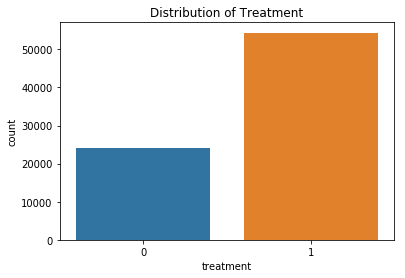

In [61]:
# Distribution of Readmission 
sns.countplot(df['treatment']).set_title('Distribution of Treatment')

Text(0.5, 1.0, 'Age of Patient VS. Treatment')

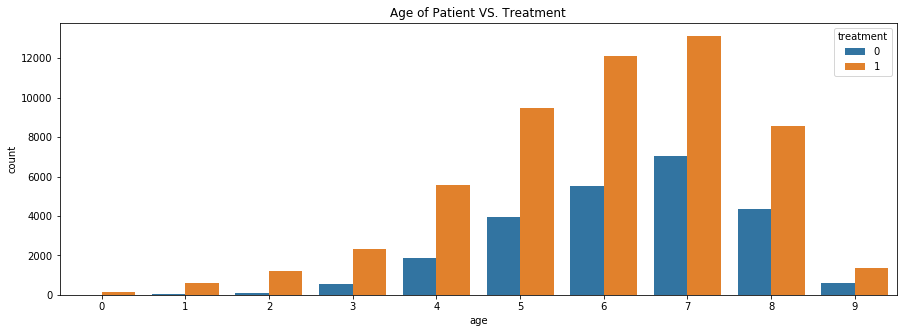

In [10]:
fig = plt.figure(figsize=(15,5))
sns.countplot(x= df['age'], hue = df['treatment']).set_title('Age of Patient VS. Treatment')

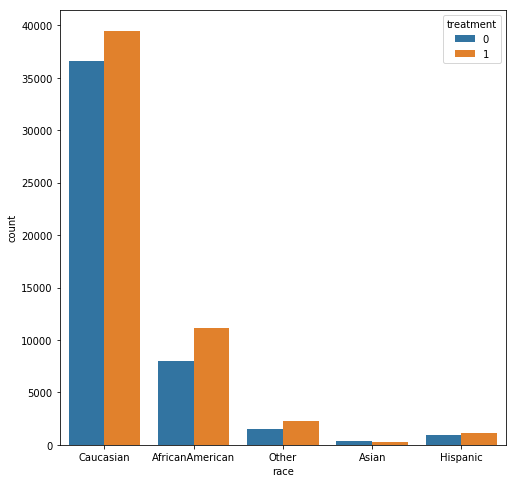

In [65]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = org_diabetes['race'], hue = org_diabetes['treatment'])

Text(0.5, 1.0, 'Number of medication used VS. Treatment')

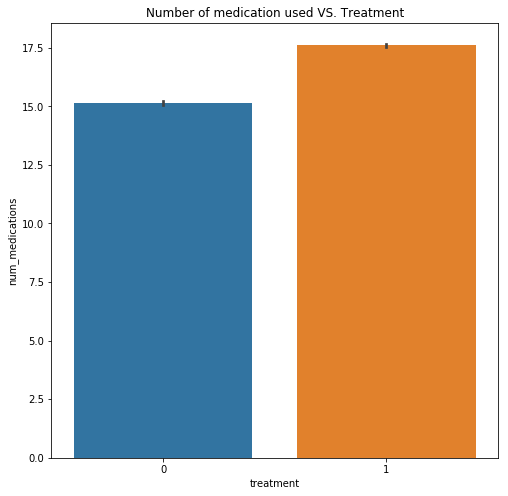

In [47]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['treatment'], y = (df['num_medications'])).set_title("Number of medication used VS. Treatment")

Text(0.5, 1.0, 'Glucose test serum test result VS. Treatment')

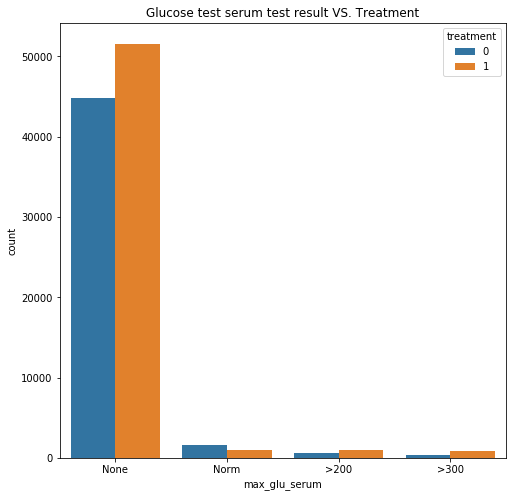

In [14]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = org_diabetes['max_glu_serum'], hue = org_diabetes['treatment']).set_title('Glucose test serum test result VS. Treatment')                                                                                                                                                                                                         

Text(0.5, 1.0, 'A1C test result VS. Treatment')

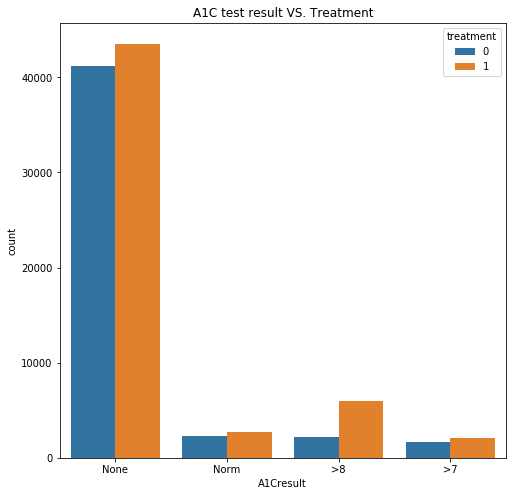

In [16]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x= org_diabetes['A1Cresult'], hue = org_diabetes['treatment']).set_title('A1C test result VS. Treatment')

Text(0.5, 1.0, 'readmission VS. Treatment')

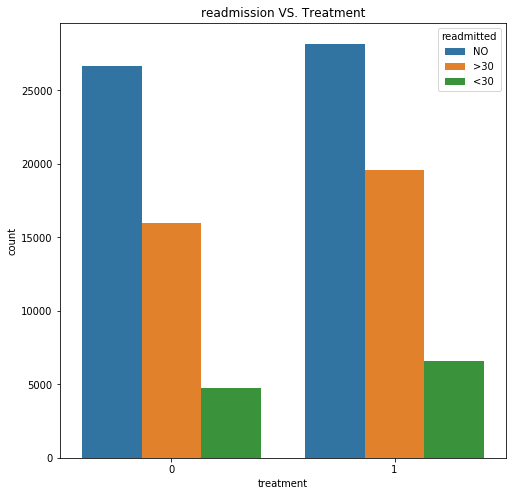

In [17]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x= org_diabetes['treatment'], hue = org_diabetes['readmitted']).set_title('readmission VS. Treatment')

Text(0.5, 1.0, 'Number of lab procedure VS. Treatment')

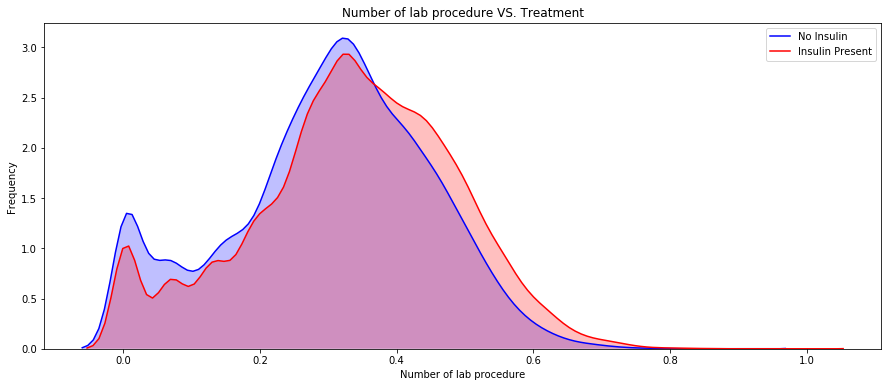

In [24]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'num_lab_procedures'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'num_lab_procedures'] , color='r',shade=True, label='Insulin Present')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Treatment')

Text(0.5, 1.0, 'Time in Hospital VS. Treatment')

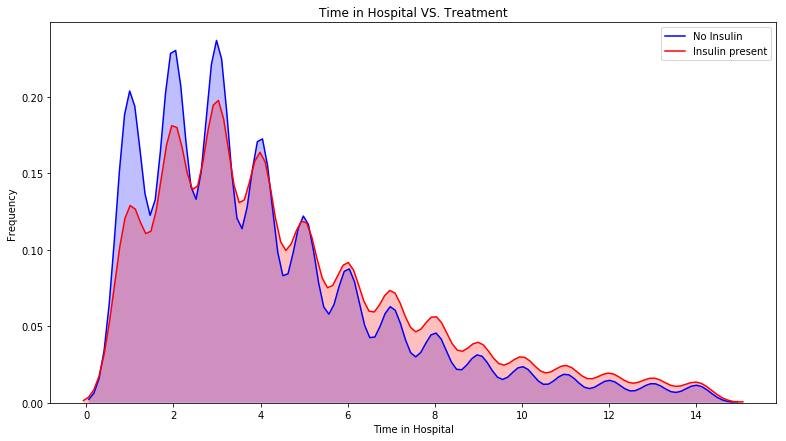

In [25]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'time_in_hospital'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'time_in_hospital'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Treatment')

Text(0.5, 1.0, 'number_diagnoses VS. Treatment')

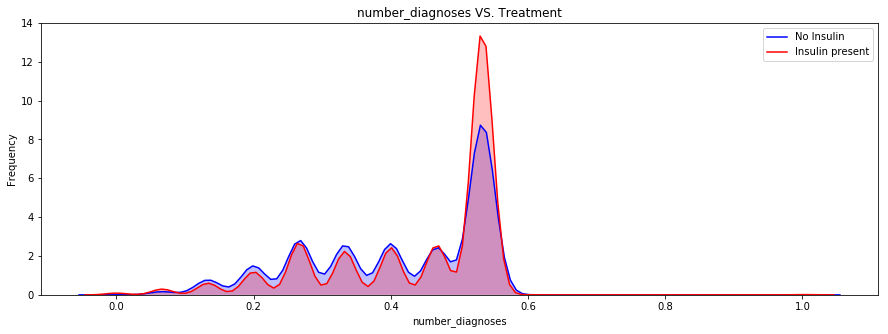

In [26]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'number_diagnoses'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'number_diagnoses'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='number_diagnoses', ylabel='Frequency')
plt.title('number_diagnoses VS. Treatment')

Text(0.5, 1.0, 'num_medications VS. Treatment')

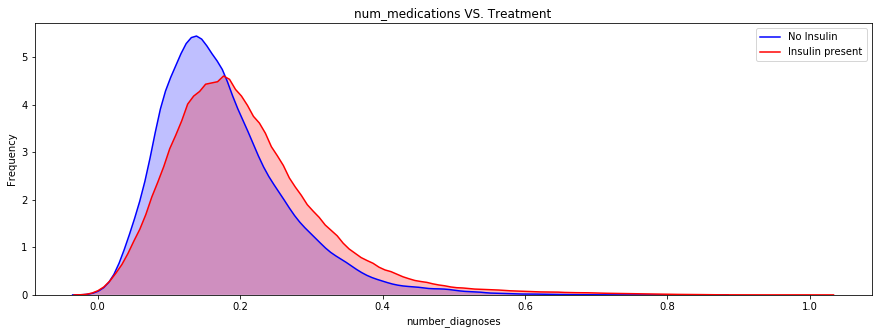

In [27]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'num_medications'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'num_medications'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='number_diagnoses', ylabel='Frequency')
plt.title('num_medications VS. Treatment')

Text(0.5, 1.0, 'number_diagnoses VS. Treatment')

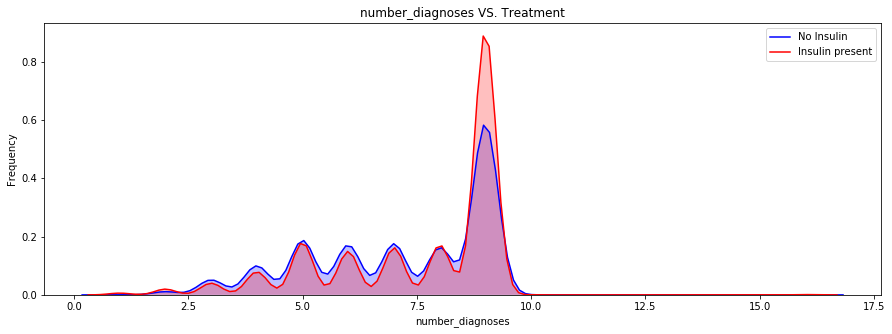

In [24]:
fig = plt.figure(figsize=(15,5),)
ax=sns.kdeplot(df.loc[(df['treatment'] == 0),'number_diagnoses'] , color='b',shade=True,label='No Insulin')
ax=sns.kdeplot(df.loc[(df['treatment'] == 1),'number_diagnoses'] , color='r',shade=True, label='Insulin present')
ax.set(xlabel='number_diagnoses', ylabel='Frequency')
plt.title('number_diagnoses VS. Treatment')

In [25]:
df.columns.values

array(['encounter_id', 'patient_nbr', 'age', 'race_?',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male',
       'gender_Unknown/Invalid', 'diabetesMed', 'max_glu_serum_>200',
       'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm',
       'A1Cresult_>7', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm',
       'change_Ch', 'change_No', 'readmitted_<30', 'readmitted_>30',
       'readmitted_NO', 'treatment', 'time_in_hospital', 'payer_code_BC',
       'payer_code_CH', 'payer_code_CM', 'payer_code_CP', 'payer_code_DM',
       'payer_code_FR', 'payer_code_HM', 'payer_code_MC', 'payer_code_MD',
       'payer_code_MP', 'payer_code_OG', 'payer_code_OT',
       'payer_code_Others', 'payer_code_PO', 'payer_code_SI',
       'payer_code_SP', 'payer_code_UN', 'payer_code_WC',
       'admission_type_id_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_type_id_4',
       'admission

# Performing chi-square analysis to identify imp features

In [8]:
import scipy.stats as stats
from scipy.stats import chi2_contingency
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [9]:
cT = ChiSquare(df)
#Feature Selection
testColumns = diabetes2.columns.values.tolist()
testColumns.remove('treatment')

In [10]:
for var in testColumns:
    cT.TestIndependence(colX=var,colY="treatment" )

encounter_id is NOT an important predictor. (Discard encounter_id from model)
patient_nbr is IMPORTANT for Prediction
age is IMPORTANT for Prediction
race_AfricanAmerican is IMPORTANT for Prediction
race_Asian is IMPORTANT for Prediction
race_Caucasian is IMPORTANT for Prediction
race_Hispanic is NOT an important predictor. (Discard race_Hispanic from model)
race_Other is IMPORTANT for Prediction
gender_Female is IMPORTANT for Prediction
gender_Male is IMPORTANT for Prediction
gender_Unknown/Invalid is NOT an important predictor. (Discard gender_Unknown/Invalid from model)
diabetesMed is NOT an important predictor. (Discard diabetesMed from model)
max_glu_serum_>200 is IMPORTANT for Prediction
max_glu_serum_>300 is IMPORTANT for Prediction
max_glu_serum_None is IMPORTANT for Prediction
max_glu_serum_Norm is IMPORTANT for Prediction
A1Cresult_>7 is NOT an important predictor. (Discard A1Cresult_>7 from model)
A1Cresult_>8 is IMPORTANT for Prediction
A1Cresult_None is IMPORTANT for Predi

In [40]:
list = ['encounter_id','patient_nbr',
       'race_Hispanic', 
       'gender_Unknown/Invalid', 'diabetesMed', 
       'A1Cresult_>7',  'readmitted_>30',
        'payer_code_CP', 
       'payer_code_FR',  'payer_code_OT',
        'payer_code_WC',
        'admission_type_id_4',
        'discharge_disposition_id_2',
       
       'discharge_disposition_id_9', 'discharge_disposition_id_10'
       , 'discharge_disposition_id_12',
        'discharge_disposition_id_16',
       'discharge_disposition_id_17',
       'discharge_disposition_id_19', 'discharge_disposition_id_20',
       'discharge_disposition_id_22', 
       'discharge_disposition_id_24', 
       'discharge_disposition_id_27', 'discharge_disposition_id_28',
        'admission_source_id_6',
       'admission_source_id_8',
        'admission_source_id_10',
       'admission_source_id_11', 'admission_source_id_13',
       'admission_source_id_14','admission_source_id_22',
       'admission_source_id_25']

In [41]:
for x in list:
    del df[x]

In [43]:
df.shape

(78363, 71)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78363 entries, 0 to 78362
Data columns (total 71 columns):
age                            78363 non-null int64
race_AfricanAmerican           78363 non-null uint8
race_Asian                     78363 non-null uint8
race_Caucasian                 78363 non-null uint8
race_Other                     78363 non-null uint8
gender_Female                  78363 non-null uint8
gender_Male                    78363 non-null uint8
max_glu_serum_>200             78363 non-null uint8
max_glu_serum_>300             78363 non-null uint8
max_glu_serum_None             78363 non-null uint8
max_glu_serum_Norm             78363 non-null uint8
A1Cresult_>8                   78363 non-null uint8
A1Cresult_None                 78363 non-null uint8
A1Cresult_Norm                 78363 non-null uint8
change_Ch                      78363 non-null uint8
change_No                      78363 non-null uint8
readmitted_<30                 78363 non-null uint8
readmit

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

# Building base model

# Random Forest Classifier

In [48]:
x = df.drop('treatment',axis=1)
y = df['treatment']
m1 = RandomForestClassifier()
print(model5)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)
model5.fit(xtrain,ytrain)
y_pred_test= model5.predict(xtest)
from sklearn.metrics import *
print('Testing set accuracy')
print(accuracy_score(ytest, y_pred_test))
print(confusion_matrix(ytest,y_pred_test))
y_pred_train = model5.predict(xtrain)
print('Training set accuracy')
print(accuracy_score(ytrain, y_pred_train))
print(confusion_matrix(ytrain,y_pred_train))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Testing set accuracy
0.7236802926538772
[[ 3649  3620]
 [ 2876 13364]]
Training set accuracy
0.9899551536806797
[[16463   248]
 [  303 37840]]


# Decision Tree Classifier

In [49]:
m2 = DecisionTreeClassifier()
m2.fit(xtrain,ytrain)
y_pred_dt=m4.predict(xtest)
Train_Score_dt = m2.score(xtrain,ytrain)
Test_Score_dt = accuracy_score(ytest,y_pred_dt)

print('Training Accuracy :',Train_Score_dt)
print('Testing Accuracy :',Test_Score_dt)
print(classification_report(ytest,y_pred_dt))

Training Accuracy : 0.9999817697888942
Testing Accuracy : 0.6697860393891701
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      7269
           1       0.76      0.76      0.76     16240

   micro avg       0.67      0.67      0.67     23509
   macro avg       0.61      0.62      0.61     23509
weighted avg       0.67      0.67      0.67     23509



# KNeighbor Classifier

In [51]:
#KNeigborsClassifier

m3=KNeighborsClassifier()
m3.fit(xtrain,ytrain)
y_pred_lr=m3.predict(xtest)
Train_Score_lr = m3.score(xtrain,ytrain)
Test_Score_lr = accuracy_score(ytest,y_pred_lr)


print('Training Accuracy is:',Train_Score_lr)
print('Testing Accuracy is:',Test_Score_lr)
print(classification_report(ytest,y_pred_lr))

Training Accuracy is: 0.7842819119845408
Testing Accuracy is: 0.6827597941214003
              precision    recall  f1-score   support

           0       0.48      0.33      0.39      7269
           1       0.74      0.84      0.79     16240

   micro avg       0.68      0.68      0.68     23509
   macro avg       0.61      0.59      0.59     23509
weighted avg       0.66      0.68      0.66     23509



# Naive Bayes Classifier

In [53]:
m4=BernoulliNB()
m4.fit(xtrain,ytrain)
print(m4)
y_pred_bnb=m4.predict(xtest)
Train_Score_bnb = m4.score(xtrain,ytrain)
Test_Score_bnb = accuracy_score(ytest,y_pred_bnb)

print('Training Accuracy :',Train_Score_bnb)
print('Testing Accuracy  :',Test_Score_bnb)
print(classification_report(ytest,y_pred_bnb))

Training Accuracy : 0.7072592700623473
Testing Accuracy  : 0.7133863626696159
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      7269
           1       0.80      0.79      0.79     16240

   micro avg       0.71      0.71      0.71     23509
   macro avg       0.67      0.67      0.67     23509
weighted avg       0.72      0.71      0.71     23509



# Tuning Base Estimators

# Tuning Decision Tree

In [55]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': np.arange(1,5,1),
    'min_samples_leaf': np.arange(1,15,1),
    'min_samples_split': np.arange(2,5,1),
    'criterion': ["entropy", "gini"]}

#Decision Tree Tuning

# fit tree on training data
tree = GridSearchCV(m2, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_split': array([2, 3, 4]), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [56]:
tree.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [57]:
m2 = DecisionTreeClassifier(random_state = 100,criterion= 'gini',max_depth= 4,min_samples_leaf= 6,min_samples_split= 2)
m2.fit(xtrain,ytrain)
y_pred_dttest = m2.predict(xtest)
print('Testing set accuracy')
print(accuracy_score(ytest, y_pred_test))
print(confusion_matrix(ytest,y_pred_test))
y_pred_dttrain = m2.predict(xtrain)
print('Training set accuracy')
print(accuracy_score(ytrain, y_pred_train))
print(confusion_matrix(ytrain,y_pred_train))

Testing set accuracy
0.7172572206389043
[[ 1305  5964]
 [  683 15557]]
Training set accuracy
0.7186531520035002
[[ 2982 13729]
 [ 1704 36439]]


# Tuning KNeighbors Classifier

In [59]:
#Gridsearch CV to find Optimal K value for KNN model
grid = {'n_neighbors':np.arange(1,20)}
    
knn_cv=GridSearchCV(m3,grid,cv=5)
knn_cv.fit(xtrain,ytrain)
 

print("Tuned Hyperparameter k: {}".format(knn_cv.best_params_))

KeyboardInterrupt: 

In [61]:
m3= KNeighborsClassifier(n_neighbors= 13)
m3.fit(xtrain,ytrain)
y_pred_kttest = m3.predict(xtest)
print('Testing set accuracy')
print(accuracy_score(ytest, y_pred_test))
print(confusion_matrix(ytest,y_pred_test))
y_pred_kttrain = m3.predict(xtrain)
print('Training set accuracy')
print(accuracy_score(ytrain, y_pred_train))
print(confusion_matrix(ytrain,y_pred_train))

Testing set accuracy
0.7029222850823089
[[ 1968  5301]
 [ 1683 14557]]
Training set accuracy
0.7468005979509242
[[ 5792 10919]
 [ 2970 35173]]


# CAT BOOST Classifier

In [62]:
pip install catboost

  Stored in directory: C:\Users\makam\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [63]:
from catboost import CatBoostClassifier, Pool,cv
#let us make the catboost model, use_best_model params will make the model prevent overfitting
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [66]:
cate_features_index = np.where(x.dtypes != int)[0]

In [67]:
model.fit(xtrain,ytrain,cat_features=cate_features_index,eval_set=(xtest,ytest))

Learning rate set to 0.118814
0:	learn: 0.7171036	test: 0.7221915	best: 0.7221915 (0)	total: 392ms	remaining: 6m 31s
1:	learn: 0.7257812	test: 0.7283168	best: 0.7283168 (1)	total: 573ms	remaining: 4m 45s
2:	learn: 0.7284063	test: 0.7281892	best: 0.7283168 (1)	total: 764ms	remaining: 4m 13s
3:	learn: 0.7291720	test: 0.7301884	best: 0.7301884 (3)	total: 979ms	remaining: 4m 3s
4:	learn: 0.7296824	test: 0.7309541	best: 0.7309541 (4)	total: 1.19s	remaining: 3m 56s
5:	learn: 0.7311408	test: 0.7328683	best: 0.7328683 (5)	total: 1.42s	remaining: 3m 55s
6:	learn: 0.7335837	test: 0.7343996	best: 0.7343996 (6)	total: 1.68s	remaining: 3m 57s
7:	learn: 0.7328545	test: 0.7336339	best: 0.7343996 (6)	total: 1.73s	remaining: 3m 34s
8:	learn: 0.7337478	test: 0.7358884	best: 0.7358884 (8)	total: 1.96s	remaining: 3m 35s
9:	learn: 0.7338936	test: 0.7345272	best: 0.7358884 (8)	total: 2.21s	remaining: 3m 38s
10:	learn: 0.7347687	test: 0.7352929	best: 0.7358884 (8)	total: 2.52s	remaining: 3m 46s
11:	learn: 0.

93:	learn: 0.7537828	test: 0.7527330	best: 0.7535412 (89)	total: 21.8s	remaining: 3m 30s
94:	learn: 0.7539286	test: 0.7528181	best: 0.7535412 (89)	total: 22s	remaining: 3m 29s
95:	learn: 0.7541109	test: 0.7526479	best: 0.7535412 (89)	total: 22.2s	remaining: 3m 29s
96:	learn: 0.7543114	test: 0.7531158	best: 0.7535412 (89)	total: 22.4s	remaining: 3m 28s
97:	learn: 0.7540015	test: 0.7534561	best: 0.7535412 (89)	total: 22.6s	remaining: 3m 27s
98:	learn: 0.7541291	test: 0.7534987	best: 0.7535412 (89)	total: 22.8s	remaining: 3m 27s
99:	learn: 0.7540927	test: 0.7535412	best: 0.7535412 (89)	total: 22.9s	remaining: 3m 26s
100:	learn: 0.7545120	test: 0.7534987	best: 0.7535412 (89)	total: 23.1s	remaining: 3m 26s
101:	learn: 0.7546760	test: 0.7541367	best: 0.7541367 (101)	total: 23.3s	remaining: 3m 25s
102:	learn: 0.7547854	test: 0.7541793	best: 0.7541793 (102)	total: 23.5s	remaining: 3m 24s
103:	learn: 0.7552047	test: 0.7544345	best: 0.7544345 (103)	total: 23.7s	remaining: 3m 24s
104:	learn: 0.75

184:	learn: 0.7630255	test: 0.7588583	best: 0.7589859 (180)	total: 42.1s	remaining: 3m 5s
185:	learn: 0.7630255	test: 0.7588583	best: 0.7589859 (180)	total: 42.3s	remaining: 3m 5s
186:	learn: 0.7634995	test: 0.7590710	best: 0.7590710 (186)	total: 42.5s	remaining: 3m 4s
187:	learn: 0.7635359	test: 0.7587732	best: 0.7590710 (186)	total: 42.7s	remaining: 3m 4s
188:	learn: 0.7636818	test: 0.7586882	best: 0.7590710 (186)	total: 43.1s	remaining: 3m 4s
189:	learn: 0.7635906	test: 0.7586882	best: 0.7590710 (186)	total: 43.4s	remaining: 3m 5s
190:	learn: 0.7634995	test: 0.7586456	best: 0.7590710 (186)	total: 43.7s	remaining: 3m 5s
191:	learn: 0.7639005	test: 0.7585606	best: 0.7590710 (186)	total: 44s	remaining: 3m 5s
192:	learn: 0.7639917	test: 0.7583904	best: 0.7590710 (186)	total: 44.3s	remaining: 3m 5s
193:	learn: 0.7641558	test: 0.7583904	best: 0.7590710 (186)	total: 44.5s	remaining: 3m 5s
194:	learn: 0.7643745	test: 0.7583904	best: 0.7590710 (186)	total: 44.8s	remaining: 3m 4s
195:	learn: 

275:	learn: 0.7705910	test: 0.7594964	best: 0.7599217 (251)	total: 1m 3s	remaining: 2m 46s
276:	learn: 0.7706275	test: 0.7593262	best: 0.7599217 (251)	total: 1m 3s	remaining: 2m 46s
277:	learn: 0.7708645	test: 0.7591986	best: 0.7599217 (251)	total: 1m 3s	remaining: 2m 45s
278:	learn: 0.7708645	test: 0.7590710	best: 0.7599217 (251)	total: 1m 4s	remaining: 2m 45s
279:	learn: 0.7711197	test: 0.7589008	best: 0.7599217 (251)	total: 1m 4s	remaining: 2m 45s
280:	learn: 0.7709556	test: 0.7587732	best: 0.7599217 (251)	total: 1m 4s	remaining: 2m 45s
281:	learn: 0.7710650	test: 0.7590285	best: 0.7599217 (251)	total: 1m 4s	remaining: 2m 44s
282:	learn: 0.7709921	test: 0.7588158	best: 0.7599217 (251)	total: 1m 4s	remaining: 2m 44s
283:	learn: 0.7710285	test: 0.7588158	best: 0.7599217 (251)	total: 1m 5s	remaining: 2m 44s
284:	learn: 0.7714843	test: 0.7591561	best: 0.7599217 (251)	total: 1m 5s	remaining: 2m 44s
285:	learn: 0.7713749	test: 0.7592411	best: 0.7599217 (251)	total: 1m 5s	remaining: 2m 43s

365:	learn: 0.7759507	test: 0.7602620	best: 0.7606874 (347)	total: 1m 24s	remaining: 2m 26s
366:	learn: 0.7759872	test: 0.7601770	best: 0.7606874 (347)	total: 1m 25s	remaining: 2m 26s
367:	learn: 0.7762424	test: 0.7600493	best: 0.7606874 (347)	total: 1m 25s	remaining: 2m 26s
368:	learn: 0.7763518	test: 0.7601344	best: 0.7606874 (347)	total: 1m 25s	remaining: 2m 26s
369:	learn: 0.7763153	test: 0.7600068	best: 0.7606874 (347)	total: 1m 25s	remaining: 2m 26s
370:	learn: 0.7763518	test: 0.7598792	best: 0.7606874 (347)	total: 1m 26s	remaining: 2m 25s
371:	learn: 0.7760419	test: 0.7600919	best: 0.7606874 (347)	total: 1m 26s	remaining: 2m 25s
372:	learn: 0.7762788	test: 0.7596240	best: 0.7606874 (347)	total: 1m 26s	remaining: 2m 25s
373:	learn: 0.7763882	test: 0.7595814	best: 0.7606874 (347)	total: 1m 26s	remaining: 2m 25s
374:	learn: 0.7764976	test: 0.7597090	best: 0.7606874 (347)	total: 1m 27s	remaining: 2m 25s
375:	learn: 0.7764429	test: 0.7597090	best: 0.7606874 (347)	total: 1m 27s	remain

455:	learn: 0.7814927	test: 0.7611128	best: 0.7613680 (437)	total: 1m 48s	remaining: 2m 9s
456:	learn: 0.7815109	test: 0.7611128	best: 0.7613680 (437)	total: 1m 48s	remaining: 2m 9s
457:	learn: 0.7816203	test: 0.7609426	best: 0.7613680 (437)	total: 1m 48s	remaining: 2m 8s
458:	learn: 0.7816568	test: 0.7609001	best: 0.7613680 (437)	total: 1m 49s	remaining: 2m 8s
459:	learn: 0.7817297	test: 0.7607299	best: 0.7613680 (437)	total: 1m 49s	remaining: 2m 8s
460:	learn: 0.7817479	test: 0.7607299	best: 0.7613680 (437)	total: 1m 49s	remaining: 2m 8s
461:	learn: 0.7818573	test: 0.7605598	best: 0.7613680 (437)	total: 1m 50s	remaining: 2m 8s
462:	learn: 0.7821307	test: 0.7606023	best: 0.7613680 (437)	total: 1m 50s	remaining: 2m 8s
463:	learn: 0.7821490	test: 0.7604322	best: 0.7613680 (437)	total: 1m 50s	remaining: 2m 7s
464:	learn: 0.7822766	test: 0.7605172	best: 0.7613680 (437)	total: 1m 50s	remaining: 2m 7s
465:	learn: 0.7822766	test: 0.7606449	best: 0.7613680 (437)	total: 1m 51s	remaining: 2m 7s

546:	learn: 0.7863055	test: 0.7607299	best: 0.7614531 (485)	total: 2m 12s	remaining: 1m 50s
547:	learn: 0.7864878	test: 0.7607725	best: 0.7614531 (485)	total: 2m 13s	remaining: 1m 49s
548:	learn: 0.7865607	test: 0.7606874	best: 0.7614531 (485)	total: 2m 13s	remaining: 1m 49s
549:	learn: 0.7866154	test: 0.7606023	best: 0.7614531 (485)	total: 2m 13s	remaining: 1m 49s
550:	learn: 0.7867430	test: 0.7606449	best: 0.7614531 (485)	total: 2m 14s	remaining: 1m 49s
551:	learn: 0.7868706	test: 0.7608575	best: 0.7614531 (485)	total: 2m 14s	remaining: 1m 49s
552:	learn: 0.7867795	test: 0.7609001	best: 0.7614531 (485)	total: 2m 14s	remaining: 1m 48s
553:	learn: 0.7869618	test: 0.7611553	best: 0.7614531 (485)	total: 2m 15s	remaining: 1m 48s
554:	learn: 0.7869982	test: 0.7613680	best: 0.7614531 (485)	total: 2m 15s	remaining: 1m 48s
555:	learn: 0.7870529	test: 0.7614531	best: 0.7614531 (485)	total: 2m 15s	remaining: 1m 48s
556:	learn: 0.7871441	test: 0.7612829	best: 0.7614531 (485)	total: 2m 15s	remain

636:	learn: 0.7913370	test: 0.7598792	best: 0.7614531 (485)	total: 2m 37s	remaining: 1m 29s
637:	learn: 0.7913735	test: 0.7598367	best: 0.7614531 (485)	total: 2m 38s	remaining: 1m 29s
638:	learn: 0.7915558	test: 0.7597516	best: 0.7614531 (485)	total: 2m 38s	remaining: 1m 29s
639:	learn: 0.7917016	test: 0.7596240	best: 0.7614531 (485)	total: 2m 38s	remaining: 1m 29s
640:	learn: 0.7917016	test: 0.7594113	best: 0.7614531 (485)	total: 2m 38s	remaining: 1m 28s
641:	learn: 0.7915558	test: 0.7595389	best: 0.7614531 (485)	total: 2m 39s	remaining: 1m 28s
642:	learn: 0.7915375	test: 0.7598367	best: 0.7614531 (485)	total: 2m 39s	remaining: 1m 28s
643:	learn: 0.7916105	test: 0.7599217	best: 0.7614531 (485)	total: 2m 39s	remaining: 1m 28s
644:	learn: 0.7916287	test: 0.7600919	best: 0.7614531 (485)	total: 2m 40s	remaining: 1m 28s
645:	learn: 0.7919204	test: 0.7602620	best: 0.7614531 (485)	total: 2m 40s	remaining: 1m 27s
646:	learn: 0.7919021	test: 0.7600493	best: 0.7614531 (485)	total: 2m 40s	remain

726:	learn: 0.7963503	test: 0.7595389	best: 0.7614531 (485)	total: 3m 3s	remaining: 1m 8s
727:	learn: 0.7963139	test: 0.7594538	best: 0.7614531 (485)	total: 3m 3s	remaining: 1m 8s
728:	learn: 0.7963321	test: 0.7597090	best: 0.7614531 (485)	total: 3m 3s	remaining: 1m 8s
729:	learn: 0.7964232	test: 0.7598367	best: 0.7614531 (485)	total: 3m 4s	remaining: 1m 8s
730:	learn: 0.7966420	test: 0.7599217	best: 0.7614531 (485)	total: 3m 4s	remaining: 1m 7s
731:	learn: 0.7966602	test: 0.7598792	best: 0.7614531 (485)	total: 3m 4s	remaining: 1m 7s
732:	learn: 0.7965144	test: 0.7597941	best: 0.7614531 (485)	total: 3m 4s	remaining: 1m 7s
733:	learn: 0.7966055	test: 0.7599217	best: 0.7614531 (485)	total: 3m 5s	remaining: 1m 7s
734:	learn: 0.7968425	test: 0.7598792	best: 0.7614531 (485)	total: 3m 5s	remaining: 1m 6s
735:	learn: 0.7966055	test: 0.7600493	best: 0.7614531 (485)	total: 3m 5s	remaining: 1m 6s
736:	learn: 0.7966785	test: 0.7603896	best: 0.7614531 (485)	total: 3m 6s	remaining: 1m 6s
737:	learn

817:	learn: 0.8013636	test: 0.7604322	best: 0.7614531 (485)	total: 3m 33s	remaining: 47.6s
818:	learn: 0.8014001	test: 0.7604747	best: 0.7614531 (485)	total: 3m 34s	remaining: 47.3s
819:	learn: 0.8014365	test: 0.7603046	best: 0.7614531 (485)	total: 3m 34s	remaining: 47.1s
820:	learn: 0.8015459	test: 0.7603471	best: 0.7614531 (485)	total: 3m 34s	remaining: 46.8s
821:	learn: 0.8016371	test: 0.7605172	best: 0.7614531 (485)	total: 3m 35s	remaining: 46.6s
822:	learn: 0.8016553	test: 0.7604322	best: 0.7614531 (485)	total: 3m 35s	remaining: 46.3s
823:	learn: 0.8016371	test: 0.7605172	best: 0.7614531 (485)	total: 3m 35s	remaining: 46.1s
824:	learn: 0.8016918	test: 0.7602620	best: 0.7614531 (485)	total: 3m 36s	remaining: 45.8s
825:	learn: 0.8018923	test: 0.7606449	best: 0.7614531 (485)	total: 3m 36s	remaining: 45.6s
826:	learn: 0.8018558	test: 0.7603896	best: 0.7614531 (485)	total: 3m 36s	remaining: 45.3s
827:	learn: 0.8018558	test: 0.7603896	best: 0.7614531 (485)	total: 3m 37s	remaining: 45.1s

908:	learn: 0.8060123	test: 0.7605598	best: 0.7614531 (485)	total: 4m 2s	remaining: 24.3s
909:	learn: 0.8060852	test: 0.7603896	best: 0.7614531 (485)	total: 4m 3s	remaining: 24s
910:	learn: 0.8062129	test: 0.7603471	best: 0.7614531 (485)	total: 4m 3s	remaining: 23.8s
911:	learn: 0.8063405	test: 0.7601770	best: 0.7614531 (485)	total: 4m 3s	remaining: 23.5s
912:	learn: 0.8063952	test: 0.7600068	best: 0.7614531 (485)	total: 4m 4s	remaining: 23.3s
913:	learn: 0.8065592	test: 0.7598792	best: 0.7614531 (485)	total: 4m 4s	remaining: 23s
914:	learn: 0.8066686	test: 0.7599217	best: 0.7614531 (485)	total: 4m 4s	remaining: 22.7s
915:	learn: 0.8067780	test: 0.7600068	best: 0.7614531 (485)	total: 4m 4s	remaining: 22.5s
916:	learn: 0.8068145	test: 0.7601344	best: 0.7614531 (485)	total: 4m 5s	remaining: 22.2s
917:	learn: 0.8068145	test: 0.7601344	best: 0.7614531 (485)	total: 4m 5s	remaining: 21.9s
918:	learn: 0.8068145	test: 0.7601770	best: 0.7614531 (485)	total: 4m 5s	remaining: 21.7s
919:	learn: 0.

999:	learn: 0.8106428	test: 0.7604747	best: 0.7617508 (971)	total: 4m 33s	remaining: 0us

bestTest = 0.7617508188
bestIteration = 971

Shrink model to first 972 iterations.


In [68]:
#show the model test acc, but you have to note that the acc is not the cv acc,
#so recommend to use the cv acc to evaluate your model!
print('the test accuracy is :{:.6f}'.format(accuracy_score(ytest,model.predict(xtest))))
test_score_catboost = accuracy_score(ytest,model.predict(xtest))
print("the train accuracy is :",model.score(xtrain,ytrain))
train_score_catboost = model.score(xtrain,ytrain)

the test accuracy is :0.761751
the train accuracy is : 0.7840449192401648


In [69]:
model.predict(xtest)

array([1., 1., 1., ..., 1., 1., 0.])